In [1]:
# a. import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create list of unique tickers for Dow Jones, S&P 500, NASDAQ and Nikkei
tickers = ['^DJI', '^GSPC', '^IXIC', '^N225']
min_date = '2018-01-12'
max_date = '2023-01-14'

# download stock data
stock_df = yf.download(tickers, start=min_date, end=max_date, progress=True)
dow = yf.download('^DJI', progress=True)

# create dataframes for close prices
stock_df_close = stock_df['Adj Close']
dow_close = dow['Adj Close']

# convert index to datetime
stock_df_close.index = pd.to_datetime(stock_df_close.index)
dow_close.index = pd.to_datetime(dow_close.index)

# rename columns to match ticker names
stock_df_close.columns = ['Dow Jones', 'S&P 500', 'NASDAQ', 'Nikkei']

[*********************100%%**********************]  4 of 4 completed
[*********************100%%**********************]  1 of 1 completed


# Problem 1

## a)

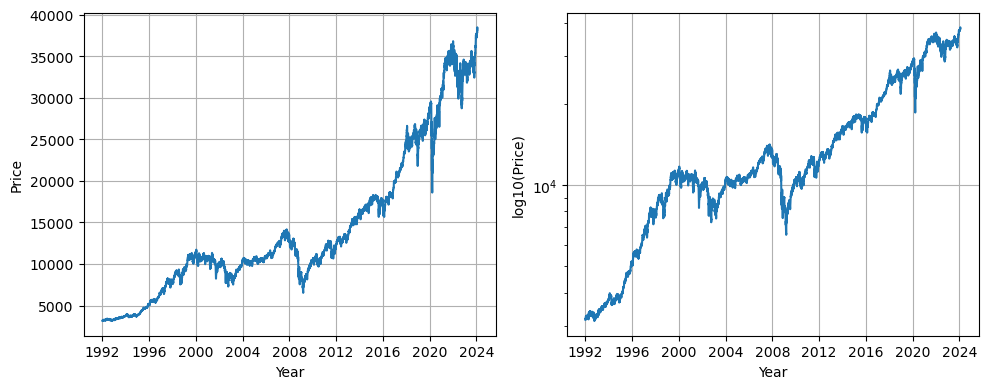

In [3]:
plt.figure(figsize=(10, 4))  # Adjust the figure size to accommodate the horizontal layout

# First subplot
plt.subplot(1, 2, 1)  # Change to 1 row, 2 columns, first plot
plt.plot(dow_close)
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

# Second subplot
plt.subplot(1, 2, 2)  # Change to 1 row, 2 columns, second plot
plt.plot(dow_close)
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('log10(Price)')
plt.grid()

#plt.suptitle('Dow Jones Industrial Av')  # Set the title for the entire figure
plt.tight_layout()  # Add this to ensure the subplots do not overlap
plt.savefig('dow.png')

## b)

In [4]:
# normalize the data to start at 100
stock_df_normalized = stock_df_close / stock_df_close.iloc[0] * 100

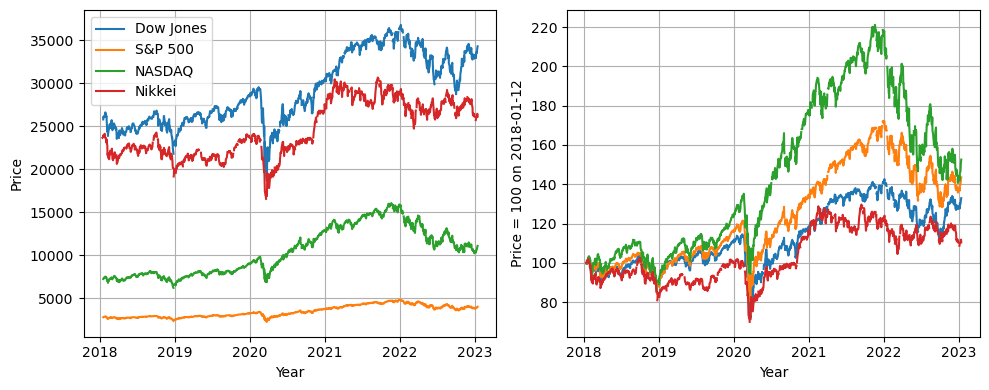

In [5]:
plt.figure(figsize=(10, 4))  # Adjust the figure size to accommodate the horizontal layout

# First subplot
plt.subplot(1, 2, 1)  # Change to 1 row, 2 columns, first plot
plt.plot(stock_df_close)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(stock_df_normalized.columns)
plt.grid()

# Second subplot
plt.subplot(1, 2, 2)  # Change to 1 row, 2 columns, second plot
plt.plot(stock_df_normalized)
plt.xlabel('Year')
plt.ylabel('Price = 100 on 2018-01-12')
plt.grid()

#plt.suptitle('Dow Jones Industrial Av')  # Set the title for the entire figure
plt.tight_layout()  # Add this to ensure the subplots do not overlap
plt.savefig('stocks_compared.png')

In [6]:
# fill missing values with the previous value
stock_df_close = stock_df_close.fillna(method='ffill')

# select data for the dates
dates = ['2018-01-12', '2019-01-11', '2020-01-13', '2021-01-13', '2022-01-13', '2023-01-13']
selected_data = stock_df_close.loc[dates]


# calculate the returns
selected_data = selected_data.pct_change()
selected_data = selected_data.dropna()

# calculate geometric and arithmetic mean of the returns
geometric_mean = (1 + selected_data).prod() ** (1 / len(selected_data)) - 1
arithmetic_mean = selected_data.mean()

# join the mean values 
mean_returns = pd.concat([geometric_mean, arithmetic_mean], axis=1)

mean_returns.columns = ['Geometric mean', 'Arithmetic mean']
mean_returns.sort_values(by='Geometric mean', ascending=False, inplace=True)

# print to latex
print(mean_returns.to_latex())


\begin{tabular}{lrr}
\toprule
 & Geometric mean & Arithmetic mean \\
\midrule
NASDAQ & 0.088182 & 0.116423 \\
S&P 500 & 0.074951 & 0.087643 \\
Dow Jones & 0.058597 & 0.064332 \\
Nikkei & 0.020030 & 0.028657 \\
\bottomrule
\end{tabular}

